# Gene prediction targets - FSEOF

In [1]:
%run 01-model.ipynb
import numpy as np

'' is not a valid SBML 'SId'.


## Intro to gene prediction targets

Strain optimization is known to be tedious and expensive but with new computational methods in metabolic engineering we can predict targets for gene up/down regulation. Normally, the production of a secondary metabolite and growth are mutually exclusive. Rather than knocking out genes which can reduce growth and fitness, up/down regulation can be a beneficial strategy. Here, we computationally will show that it is possible to find targets that could be up/down regulated benefiting the flux towards the production of Psilocybin. The method Flux variability scanning based on enforced objective flux(FVSEOF) is useful for identifying gene amplification targets (J.M. Park et al 2012). This method scans fluxes in artificially imposed objective fluxes. The hope of this analysis is that these targets are novel but also that previous targets are found to validate the method. 

Below, we're using the computer aided metabolic engineering and optimization(CAMEO) tool to run an Flux variability scanning based on enforced objective flux. 

In [2]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.psiM)
df = result.data_frame

After running the analysis we can plot the predicted targets that shows an increase or decrease in flux when the target is set to the last step of the psilocybin pathway. 

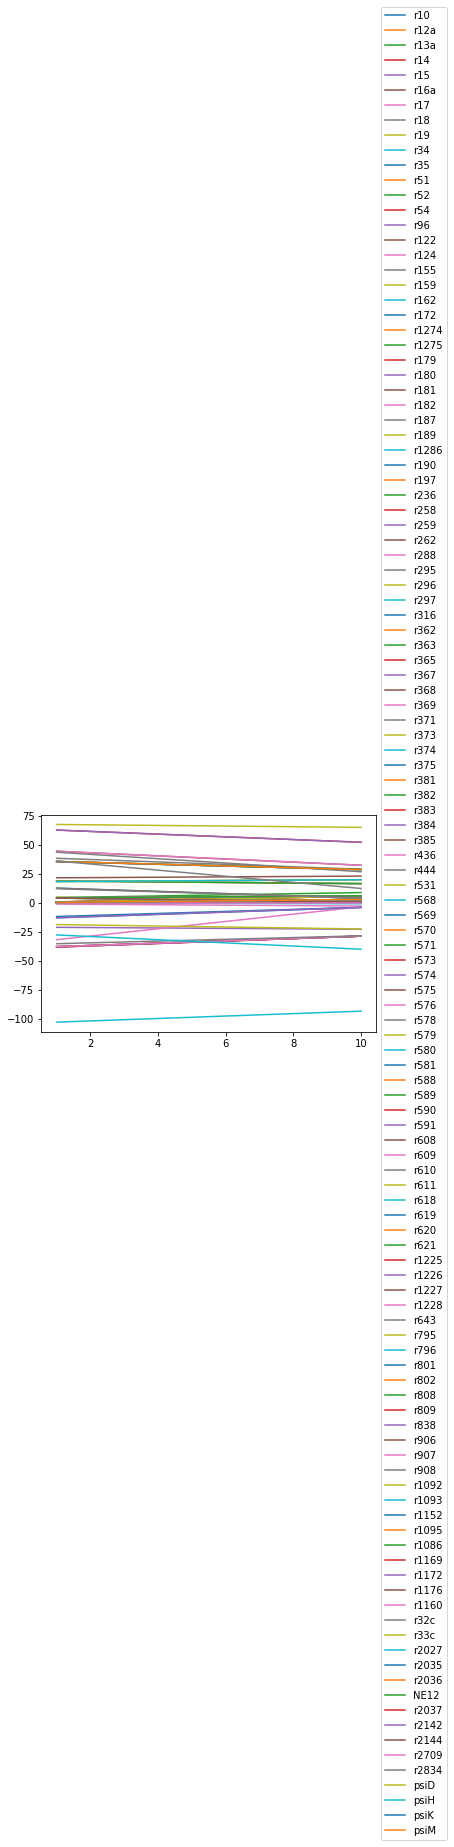

In [3]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

To get a better overview of the results we can sort the values and remove all the ones that have a flux change of 0.0

In [4]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r189,67.301691,67.025924,66.750157,66.474389,66.198622,65.922855,65.647087,65.371320,65.095553,64.819785
r14,62.475979,61.310735,60.145491,58.980247,57.815003,56.649759,55.484514,54.319270,53.154026,51.988782
r15,62.475979,61.310735,60.145491,58.980247,57.815003,56.649759,55.484514,54.319270,53.154026,51.988782
r16a,44.286841,42.944801,41.602762,40.260722,38.918683,37.576643,36.234604,34.892565,33.550525,32.208486
r17,44.286841,42.944801,41.602762,40.260722,38.918683,37.576643,36.234604,34.892565,33.550525,32.208486


These results show 10 the enzymes that show the highest increase or decrease in flux. The whole dataframe consistes of 95 rows which means 95 reactions have a change of flux. 

To get a better overview of the changes in flux and genes we can plot the in the following way. 

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

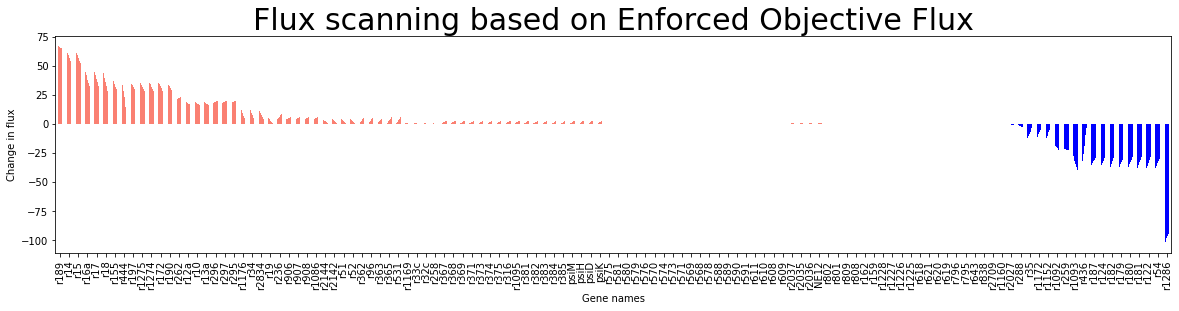

In [5]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar', color=bar_color(df,'salmon','blue'),figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

#### We want to see what the relative change is for the different fluxes. This can be calculated like this: R = (B-A) / B +1


In [6]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

#### If we look at the reactions that have a higher relative_change_in_flux than 80% we can find target rections. 

In [7]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [8]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r362,0.654791,1.199008,1.743225,2.287441,2.831658,3.375874,3.920091,4.464308,5.008524,5.552741,1.882078
r96,0.654791,1.199008,1.743225,2.287441,2.831658,3.375874,3.920091,4.464308,5.008524,5.552741,1.882078
r363,0.631173,1.177726,1.724278,2.270831,2.817383,3.363936,3.910488,4.457041,5.003593,5.550145,1.886278
r365,0.631173,1.177726,1.724278,2.270831,2.817383,3.363936,3.910488,4.457041,5.003593,5.550145,1.886278
r531,0.622621,1.170019,1.717417,2.264816,2.812214,3.359612,3.907011,4.454409,5.001807,5.549206,1.887800
r367,0.421718,0.684497,0.947277,1.210057,1.472837,1.735616,1.998396,2.261176,2.523956,2.786735,1.848670
r368,0.421718,0.684497,0.947277,1.210057,1.472837,1.735616,1.998396,2.261176,2.523956,2.786735,1.848670
r369,0.421718,0.684497,0.947277,1.210057,1.472837,1.735616,1.998396,2.261176,2.523956,2.786735,1.848670
r371,0.421718,0.684497,0.947277,1.210057,1.472837,1.735616,1.998396,2.261176,2.523956,2.786735,1.848670
r373,0.421718,0.684497,0.947277,1.210057,1.472837,1.735616,1.998396,2.261176,2.523956,2.786735,1.848670


In [9]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

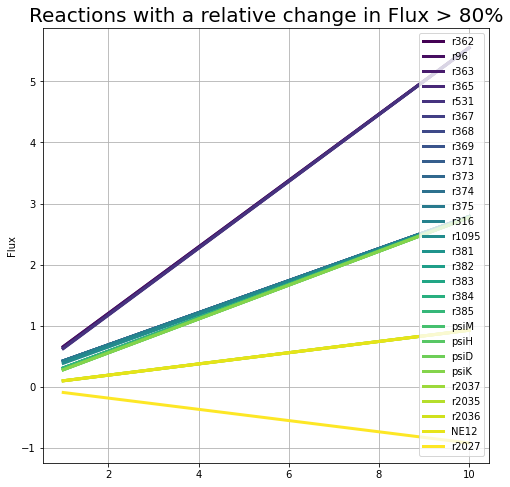

In [10]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

What we see here is that many of the reactions have the same relative change in flux. This is probably due to them being linked to eachother in the model.

In [11]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r2037,0.095759,0.187784,0.27981,0.371835,0.46386,0.555886,0.647911,0.739937,0.831962,0.923987,1.896363
r2035,0.095759,0.187784,0.27981,0.371835,0.46386,0.555886,0.647911,0.739937,0.831962,0.923987,1.896363
r2036,0.095759,0.187784,0.27981,0.371835,0.46386,0.555886,0.647911,0.739937,0.831962,0.923987,1.896363
NE12,0.095759,0.187784,0.27981,0.371835,0.46386,0.555886,0.647911,0.739937,0.831962,0.923987,1.896363
r2027,-0.095759,-0.187784,-0.27981,-0.371835,-0.46386,-0.555886,-0.647911,-0.739937,-0.831962,-0.923987,1.896363


In [12]:
#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r362,0.654791,1.199008,1.743225,2.287441,2.831658,3.375874,3.920091,4.464308,5.008524,5.552741,1.882078
r96,0.654791,1.199008,1.743225,2.287441,2.831658,3.375874,3.920091,4.464308,5.008524,5.552741,1.882078
r363,0.631173,1.177726,1.724278,2.270831,2.817383,3.363936,3.910488,4.457041,5.003593,5.550145,1.886278
r365,0.631173,1.177726,1.724278,2.270831,2.817383,3.363936,3.910488,4.457041,5.003593,5.550145,1.886278
r531,0.622621,1.170019,1.717417,2.264816,2.812214,3.359612,3.907011,4.454409,5.001807,5.549206,1.887800


#### Top 10 targets for upregulation: 

##### r362 = Methionine synthase
Upregulation of this makes more methionine, from homocysteine, which allows increased SAM and SAH production 
##### r96 = Methylenetetrahydrofolate reductase (NADPH)
MTHFR metabolism converts 5,10-methylenetetrahydrofolate to 5-Methyltetrahydrofolate which can be metabolized into methionine and then be used in the SAM and SAH production.
##### r363 = S-adenosylmethionine synthetase
Enzyme used for SAM production. 
##### r365 = Adenosylhomocysteinase (S-adenosyl-l-homocysteine hydrolase)
Enzyme used for SAH production.
##### r531 = Adenosine kinase 
Important in the methylation reactions SAH. 	
##### r367: 3-deoxy-7-phosphoheptulonate synthase
Is the first enzyme in a series of metabolic reactions known as the shikimate pathway,
##### r368: pentafunctional arom polypeptide (3-dehydroquinate synthase, 3-dehydroquinate dehydrata…)
The AROM polypeptide catalyzes 5 consecutive enzymatic reactions in prechorismate polyaromatic amino acid biosynthesis.
##### r369: Catabolic 3-dehydroquinase (3-dehydroquinate dehydratase)
Third step in the shikimate pathway to produce aromatic amino acids.
##### r371 = Quinate 5-dehydrogenase:
Second step in the Shikimate pathway to produce aromatic amino acids. 
##### r373 = Shikimate kinase I, II: 
Fifth step in the shikimate pathway. 


### Summary
From the FSOEV analysis we have found targets with a relative change in flux of more than 80%. Interestingly a pattern emrges from the top 10 best targets for up-regulation and that is they can be grouped into enzymes belonging to the Shikimate pathway or methylation reactions including the SAM and SAH. 

This is a very interesting results since, the shikimate pathway has been used as a target to increase Tryptophan synthesis in previous studies of Psilocybin production (N. Milne et al, 2020). To be specific the two first enzymes of Shikimate pathway were overexpressed as a rational engineering approach in the paper "Metabolic engineering of Saccharomyces cerevisiae for the de novo production of psilocybin and related tryptamine derivatives"(N. Milne et al, 2020). Our resulst show that it could be benificial to pverexpress some other parts of the pathway which could be interesting to look into for further research. 
For the methylation reactions that includes the SAM and SAH the targets we have found have also been researched before and shows that this SAM salvage is critical for high titers of Psilocybin (R. Demmler et al, 2020). Again our results indicate additional targets that were not investigated i.e. r96 Methylenetetrahydrofolate reductase, which could be interesting to investigate. 

Lastly, the list contains even more targets up-regulation which could be benificial to investigate in another project. 


## References

1. Demmler R, Fricke J, Dörner S, Gressler M, Hoffmeister D. S-Adenosyl-l-Methionine Salvage Impacts Psilocybin Formation in “Magic” Mushrooms. ChemBioChem. 2020;21(9):1364-1371. doi:https://doi.org/10.1002/cbic.201900649
2. Park JM, Park HM, Kim WJ, Kim HU, Kim TY, Lee SY. Flux variability scanning based on enforced objective flux for identifying gene amplification targets. BMC Systems Biology. 2012;6(1):106. doi:10.1186/1752-0509-6-106
3. Milne N, Thomsen P, Mølgaard Knudsen N, Rubaszka P, Kristensen M, Borodina I. Metabolic engineering of Saccharomyces cerevisiae for the de novo production of psilocybin and related tryptamine derivatives. Metabolic Engineering. 2020;60:25-36. doi:10.1016/j.ymben.2019.12.007



